### Text Mining assignment 
1) Extract reviews of any product from ecommerce website like amazon 2) Perform emotion mining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests
import string

C:\Users\91810\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91810\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\91810\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from matplotlib.pyplot import imread
from wordcloud import WordCloud

In [3]:
import spacy
import nltk

In [4]:
import re
from textblob import TextBlob

In [5]:
%matplotlib inline


In [6]:
wm_title=[]  
wm_date = []
wm_content = []
wm_rating = []

review_title = []
review_rating = []
review_content = []
review_dates = []


for i in range(1,150):
    link ="https://www.amazon.in/OnePlus-Nord-Charcoal-128GB-Storage/product-reviews/B09576CYNP/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(link)
    print(i)
    soup = bs(response.content,"html.parser")
    title = soup.find_all('a',class_='review-title-content')
   # title = soup.find_all('a',class_='review-title-content')

    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
        review_title[:] = [titles.lstrip('\n') for titles in review_title]
        review_title[:] = [titles.rstrip('\n') for titles in review_title]
        wm_title = wm_title + review_title
    
    rating = soup.find_all('i',class_='review-rating')

    for i in range(2,len(rating)):
        review_rating.append(rating[i].get_text())
        review_rating[:] = [reviews.rstrip(' out of 5 stars') for reviews in review_rating]
        wm_rating = wm_rating + review_rating 
        
    review = soup.find_all("span",{"data-hook":"review-body"})

    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
        review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
        wm_content = wm_content + review_content
        
    dates = soup.find_all('span',class_='review-date')

    for i in range(2,len(rating)):
        review_dates.append(dates[i].get_text())
        review_dates[:] = [reviews.lstrip('Reviewed in India on') for reviews in review_dates]
        wm_date  = wm_date + review_dates

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [7]:
dataframe_contents = list(zip(wm_title, wm_rating, wm_content, wm_date))


In [8]:
dataframe = pd.DataFrame(dataframe_contents, columns=["Title", "Rating", "Content", "Date"])


In [9]:
dataframe.dtypes


Title      object
Rating     object
Content    object
Date       object
dtype: object

In [10]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Rating'] = dataframe['Rating'].astype(float)

In [11]:
dataframe.shape


(627760, 4)

In [12]:
dataframe.tail()

Title  Rating  \
627755                   Speaker stopped working suddenly     1.0   
627756  Don't buy it Worst phone from OnePlus ever. Th...     1.0   
627757                                  Waste of money...     1.0   
627758                                        Not so good     2.0   
627759   Great phone ability to compete with OnePlus nord     4.0   

                                                  Content       Date  
627755    Not even one month completed my phone speake... 2021-12-16  
627756    It's very slow when you open contacts and se... 2021-08-28  
627757    For high range I purchased 12gb but  facing ... 2022-02-22  
627758    As compared to price , not good in camera qu... 2022-01-25  
627759    It's a good phone and comes with great featu... 2021-10-19

<AxesSubplot:xlabel='Rating', ylabel='count'>

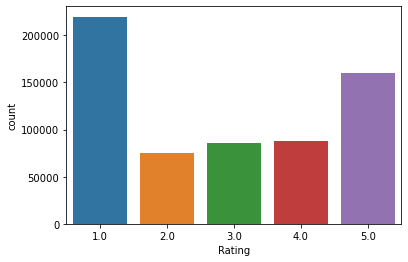

In [13]:
sns.countplot(x = 'Rating', data = dataframe)


In [14]:
def clean_content(Content):
    content = re.sub('@[A-Za-z0–9]+', '', Content) #Removing tag(@)
    content = re.sub('#', '', Content) # Removing hashtag(#)
    content = re.sub('RT[\s]+', '', Content) # Removing RT
    content = re.sub('https?:\/\/\S+', '', Content) # Removing links
    return content
 
dataframe["Text"] = dataframe.Content.apply(clean_content)
dataframe.head()

Title  Rating                                            Content  \
0  It's awesome     5.0    I really like the processor and the quality ...   
1  It's awesome     5.0    I really like the processor and the quality ...   
2  First review     5.0                      The media could not be loa...   
3  It's awesome     5.0    I really like the processor and the quality ...   
4  First review     5.0                      The media could not be loa...   

        Date                                               Text  
0 2021-06-20    I really like the processor and the quality ...  
1 2021-06-20    I really like the processor and the quality ...  
2 2021-06-20                      The media could not be loa...  
3 2021-06-20    I really like the processor and the quality ...  
4 2021-06-20                      The media could not be loa...

In [15]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Text.apply(calc_subj)
dataframe['Polarity'] = dataframe.Text.apply(calc_pola)
dataframe.head()


Title  Rating                                            Content  \
0  It's awesome     5.0    I really like the processor and the quality ...   
1  It's awesome     5.0    I really like the processor and the quality ...   
2  First review     5.0                      The media could not be loa...   
3  It's awesome     5.0    I really like the processor and the quality ...   
4  First review     5.0                      The media could not be loa...   

        Date                                               Text  Subjectivity  \
0 2021-06-20    I really like the processor and the quality ...      0.244444   
1 2021-06-20    I really like the processor and the quality ...      0.244444   
2 2021-06-20                      The media could not be loa...      0.426667   
3 2021-06-20    I really like the processor and the quality ...      0.244444   
4 2021-06-20                      The media could not be loa...      0.426667   

   Polarity  
0  0.188889  
1  0.188889  
2  0.220000  
3  0.188889  
4  0.220000

In [16]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
dataframe['Sentiment'] = dataframe.Polarity.apply(sentiment)
dataframe.tail()

Title  Rating  \
627755                   Speaker stopped working suddenly     1.0   
627756  Don't buy it Worst phone from OnePlus ever. Th...     1.0   
627757                                  Waste of money...     1.0   
627758                                        Not so good     2.0   
627759   Great phone ability to compete with OnePlus nord     4.0   

                                                  Content       Date  \
627755    Not even one month completed my phone speake... 2021-12-16   
627756    It's very slow when you open contacts and se... 2021-08-28   
627757    For high range I purchased 12gb but  facing ... 2022-02-22   
627758    As compared to price , not good in camera qu... 2022-01-25   
627759    It's a good phone and comes with great featu... 2021-10-19   

                                                     Text  Subjectivity  \
627755    Not even one month completed my phone speake...      0.587500   
627756    It's very slow when you open contacts and se...      0.406667   
627757    For high range I purchased 12gb but  facing ...      0.385000   
627758    As compared to price , not good in camera qu...      0.450000   
627759    It's a good phone and comes with great featu...      0.477778   

        Polarity Sentiment  
627755 -0.237500  Negative  
627756 -0.063333  Negative  
627757  0.073333  Positive  
627758 -0.116667  Negative  
627759  0.388889  Positive

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

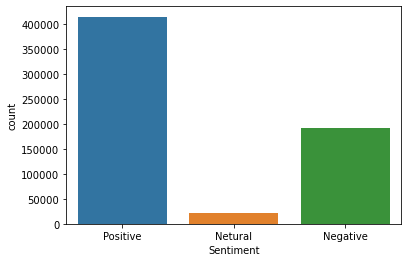

In [17]:
sns.countplot(x = 'Sentiment', data = dataframe)


Text(0, 0.5, 'Subjectivity')

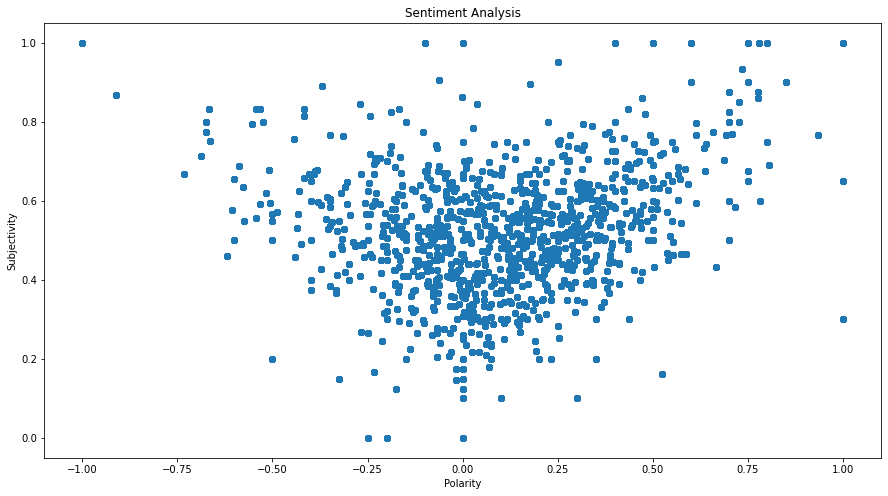

In [18]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [19]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=dataframe['Sentiment'].value_counts(), name="Sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [20]:
# setting up stop words 
nltk.download('stopwords')  
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords = ' '.join([twts for twts in dataframe['Text']])
#allWords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91810\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# setting up stop words 
nltk.download('stopwords')  # run this if you get any error
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords_ = ' '.join([twts for twts in dataframe[:500]['Text']])
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91810\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


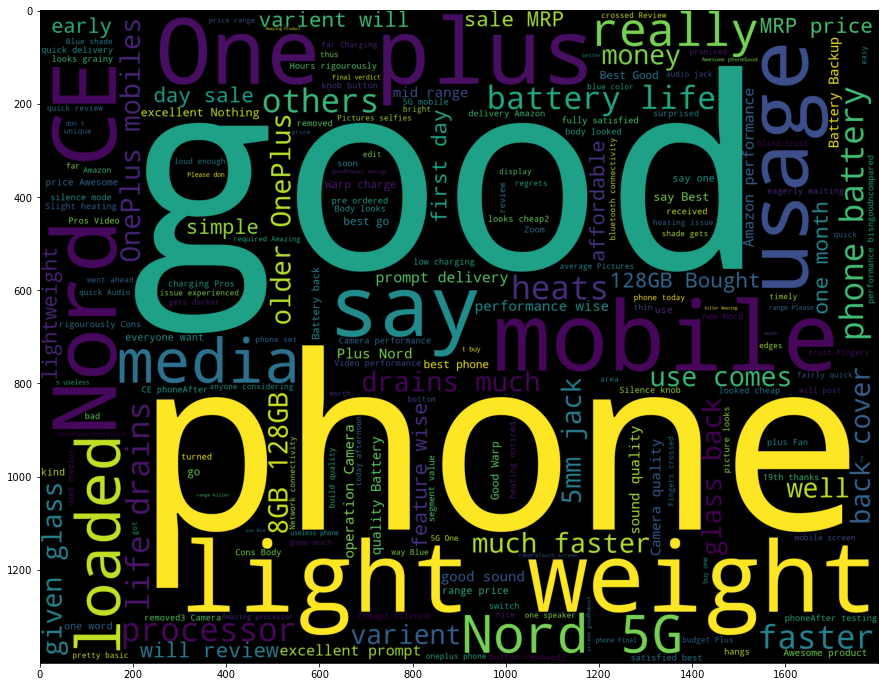

In [22]:
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91810\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [31]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
with open("negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")
  

pos_words = poswords[35:]
neg_words = negwords[35:]


sentences = dataframe[0:500]["Text"].to_list()

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re

filtered_sent=[]
for i in range(len(sentences)):
    review = re.sub("[^A-Za-z" "]+"," ",sentences[i])
    review = re.sub("[0-9" "]+"," ",sentences[i])
    
    review = review.lower()
    review =review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_sent.append(review)

filtered_sent[0:5]

["really like processor quality camera phone's battery life drain much faster older oneplus mobile . also heat faster others",
 "really like processor quality camera phone's battery life drain much faster older oneplus mobile . also heat faster others",
 'medium could loaded. mobile light weight good use , come . mm jack well,should given glass back cover price. varient gb/ gb.bought first day sale. mrp , /-. price , varient.will review one month usage.',
 "really like processor quality camera phone's battery life drain much faster older oneplus mobile . also heat faster others",
 'medium could loaded. mobile light weight good use , come . mm jack well,should given glass back cover price. varient gb/ gb.bought first day sale. mrp , /-. price , varient.will review one month usage.']

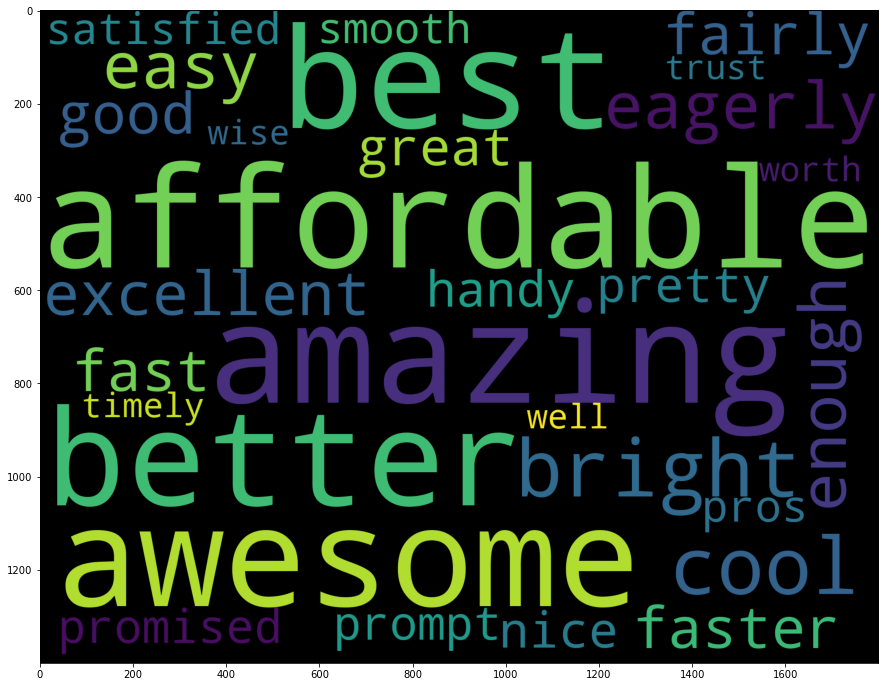

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(filtered_sent)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
sentences_df =pd.DataFrame(denselist, columns=feature_names)
sentences_df.head()

f, axes = plt.subplots(figsize=(20,12))
pos_words = ' '.join([w for w in sentences_df if w in poswords])

cloud_pos = WordCloud(
        background_color = 'black',
        width =1800,
        height=1400).generate(pos_words)
plt.imshow(cloud_pos)

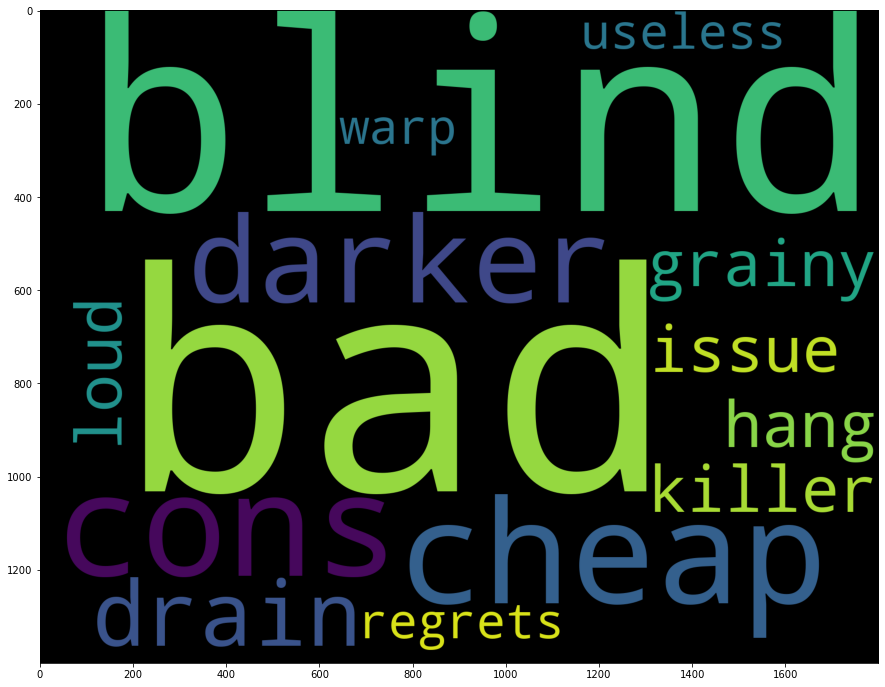

In [33]:
f, axes = plt.subplots(figsize=(20,12))
neg_words = ' '.join([w for w in sentences_df if w in negwords])

cloud_neg = WordCloud(
        background_color='black',
        width =1800,
        height =1400).generate(neg_words)
plt.imshow(cloud_neg)